# Модуль 2: Обработка NULL-значений и несоответствий форматов (даты, строки).

**Тема: Работа с пропусками и форматами данных в Tableau
Цель**: Научить обрабатывать NULL-значения и исправлять несоответствия в форматах дат и строк с помощью формул Tableau, чтобы расчёты были надёжными и без ошибок.

## Теория
**Что такое NULL-значения и несоответствия форматов?**  
* **NULL-значения**: Это пропуски в данных, когда в ячейке ничего нет. Например, у заказа может не быть указана дата доставки или сумма продаж. NULL может сломать формулы, если их не обработать.  
* **Несоответствия форматов**: Это когда данные выглядят неправильно, например, даты записаны как строки ("01-01-2025" вместо 2025-01-01) или числа в текстовом формате ("1000" вместо 1000). Tableau может не понять такие данные, и расчёты не сработают.

⠀**Зачем это нужно?**
Обработка NULL и форматов — это как уборка перед готовкой: без неё всё пойдёт не так. Правильная обработка делает твои дашборды надёжными, а результаты — точными, даже если данные кривые.
**Как обрабатывать NULL?**  
* ZN([Field]): Заменяет NULL на 0 для чисел (например, ZN(SUM([Sales]))).  
Пример данных:

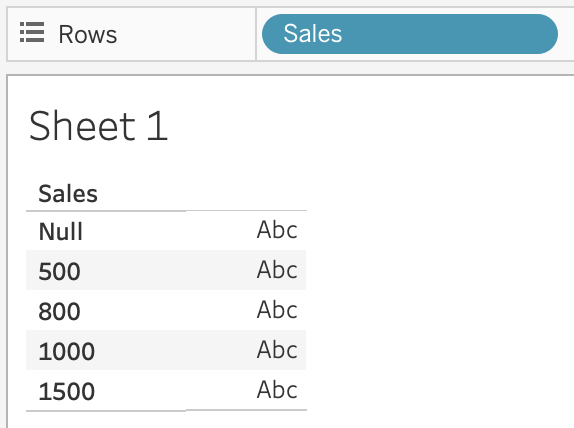<!-- {"width":321} -->

Создаем расчетное поле:

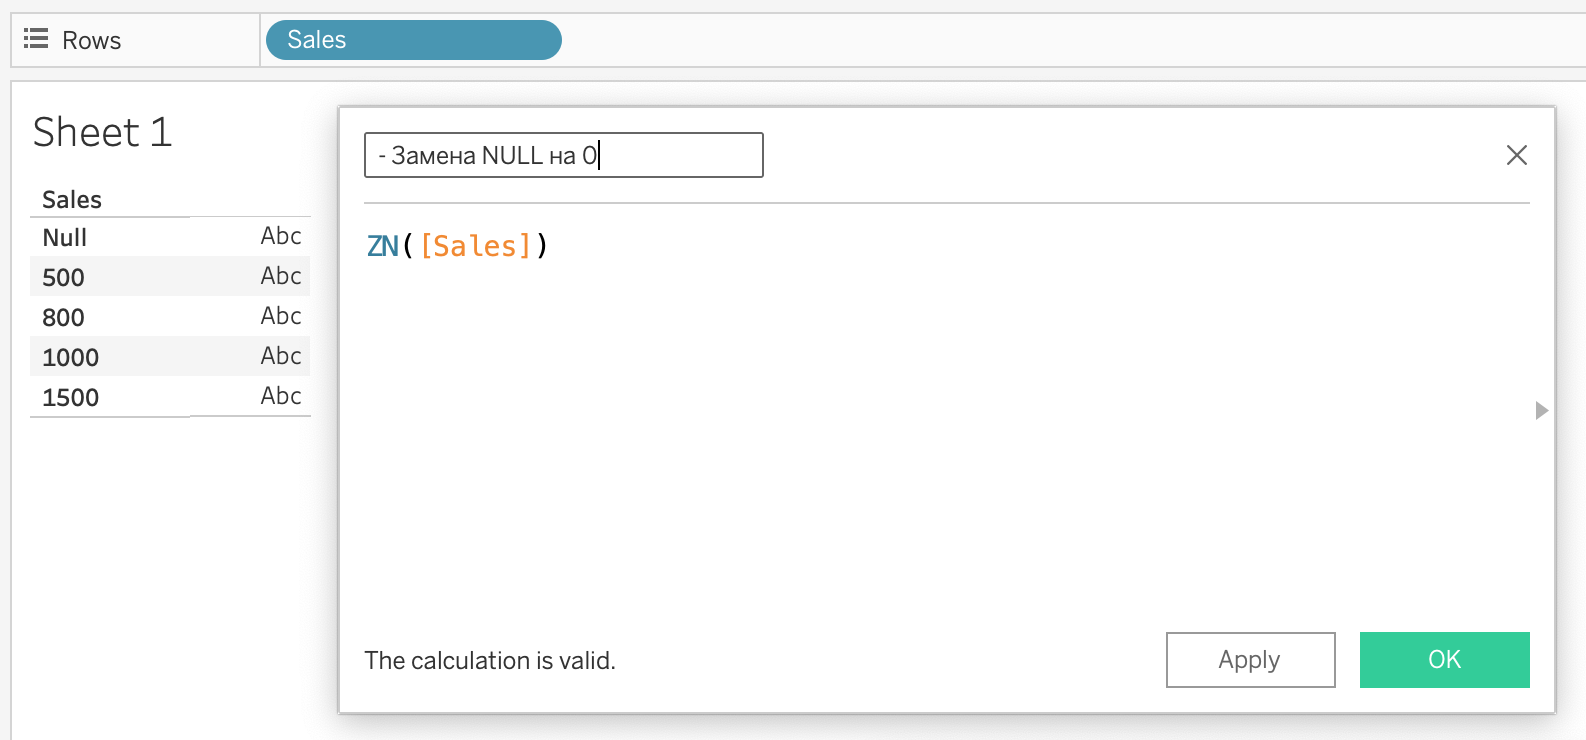

Результат:

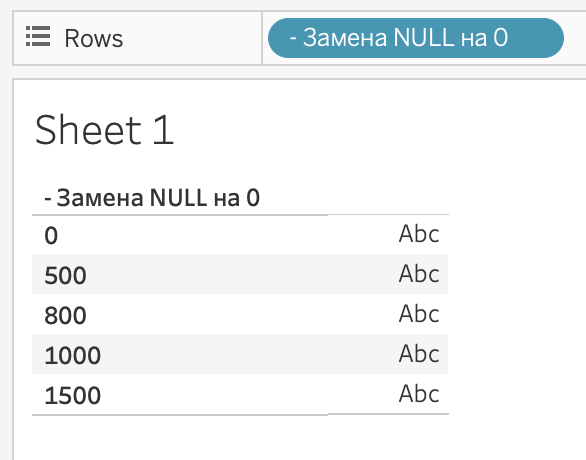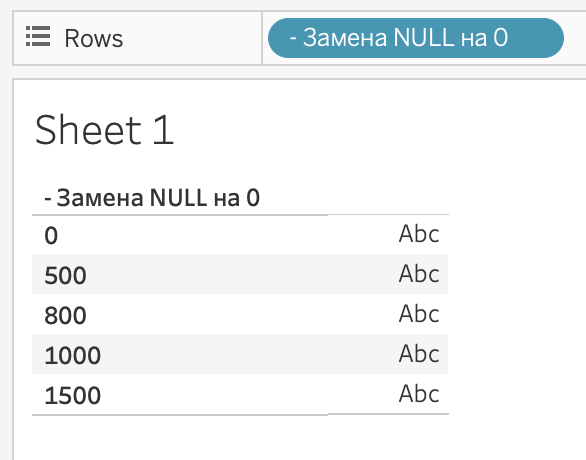<!-- {"width":332} -->

* IFNULL([Field], Value): Заменяет NULL на заданное значение (например, IFNULL([Sales], 0) или IFNULL([Ship Date], TODAY())).

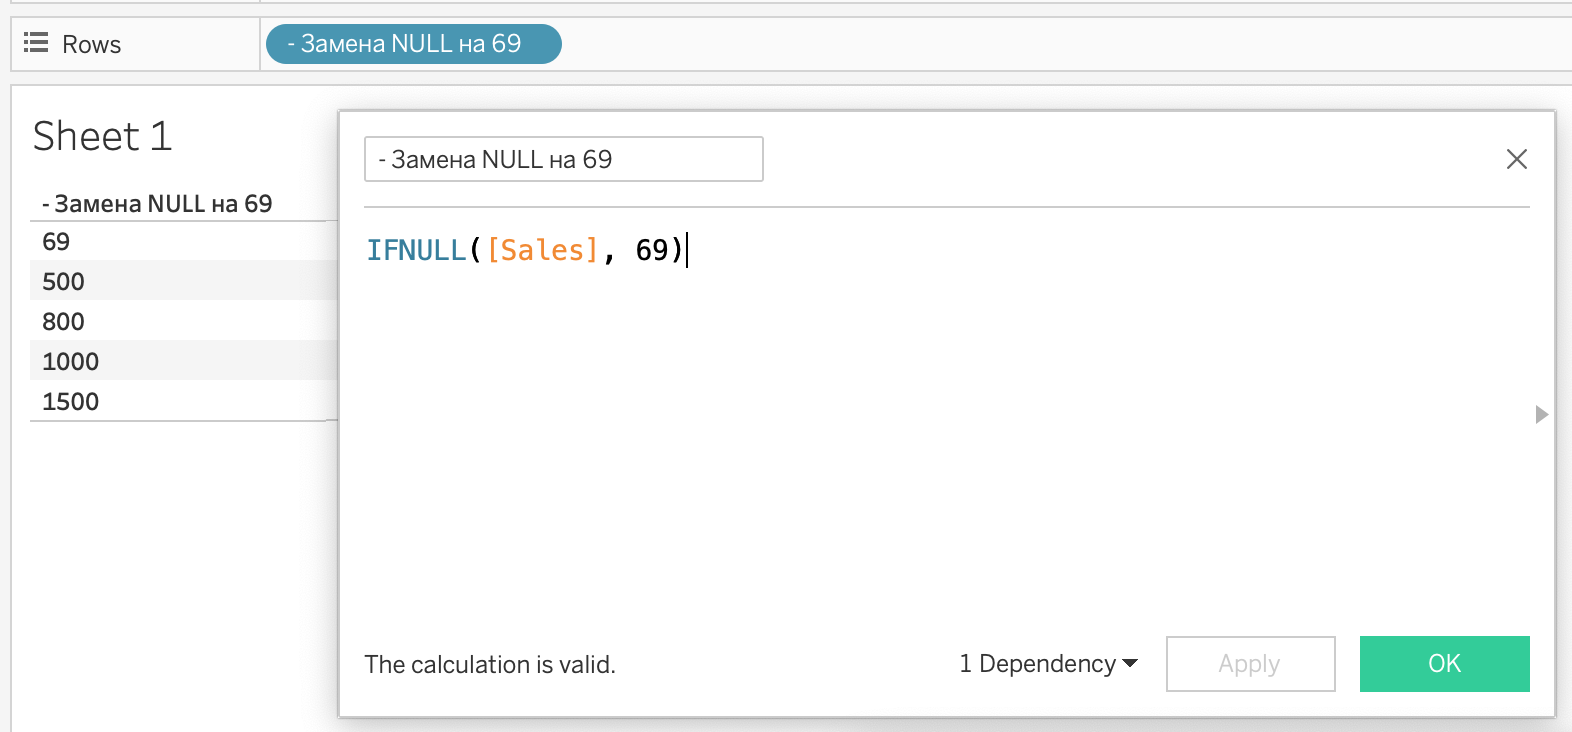

* ISNULL([Field]): Проверяет, является ли значение NULL (например, IF ISNULL([Sales]) THEN 0 ELSE [Sales] END).

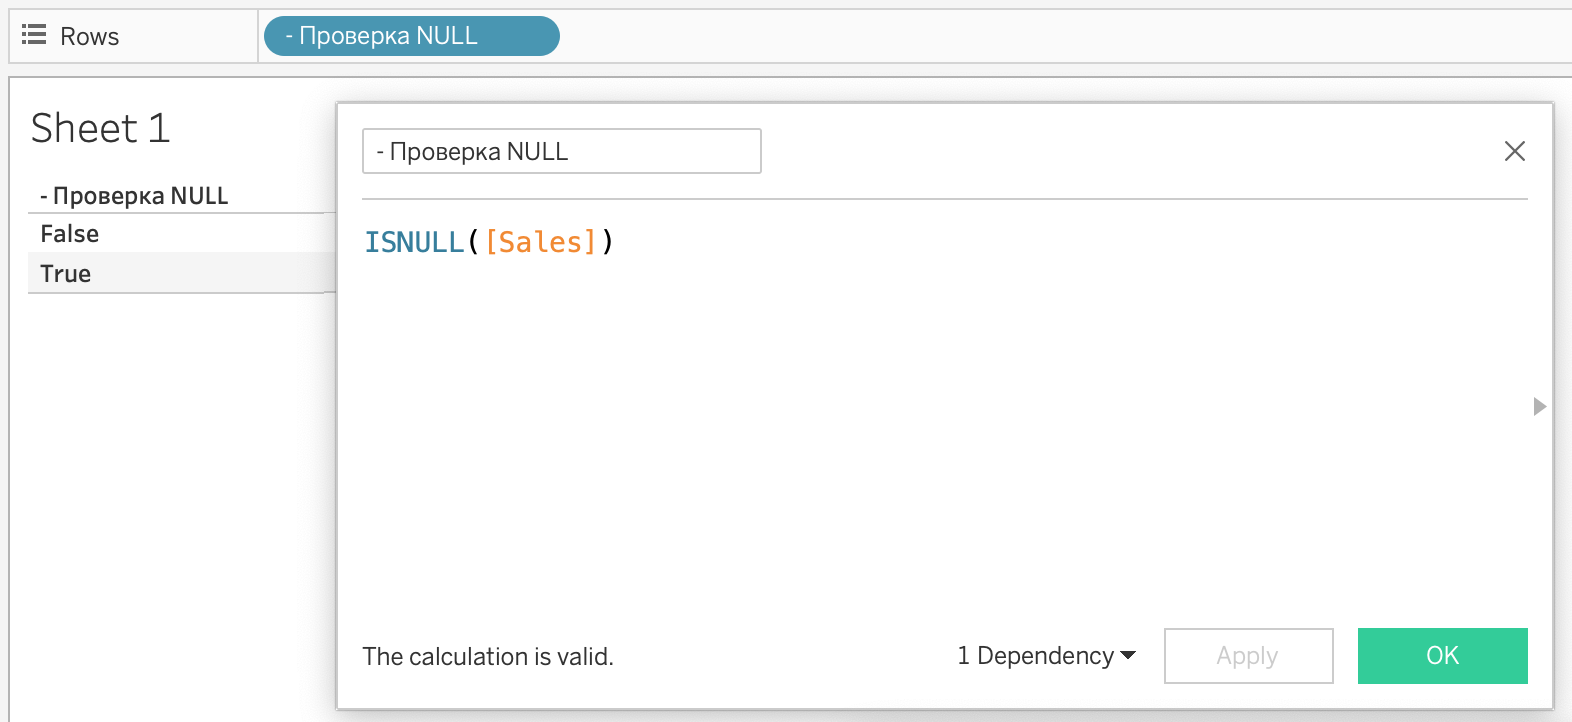

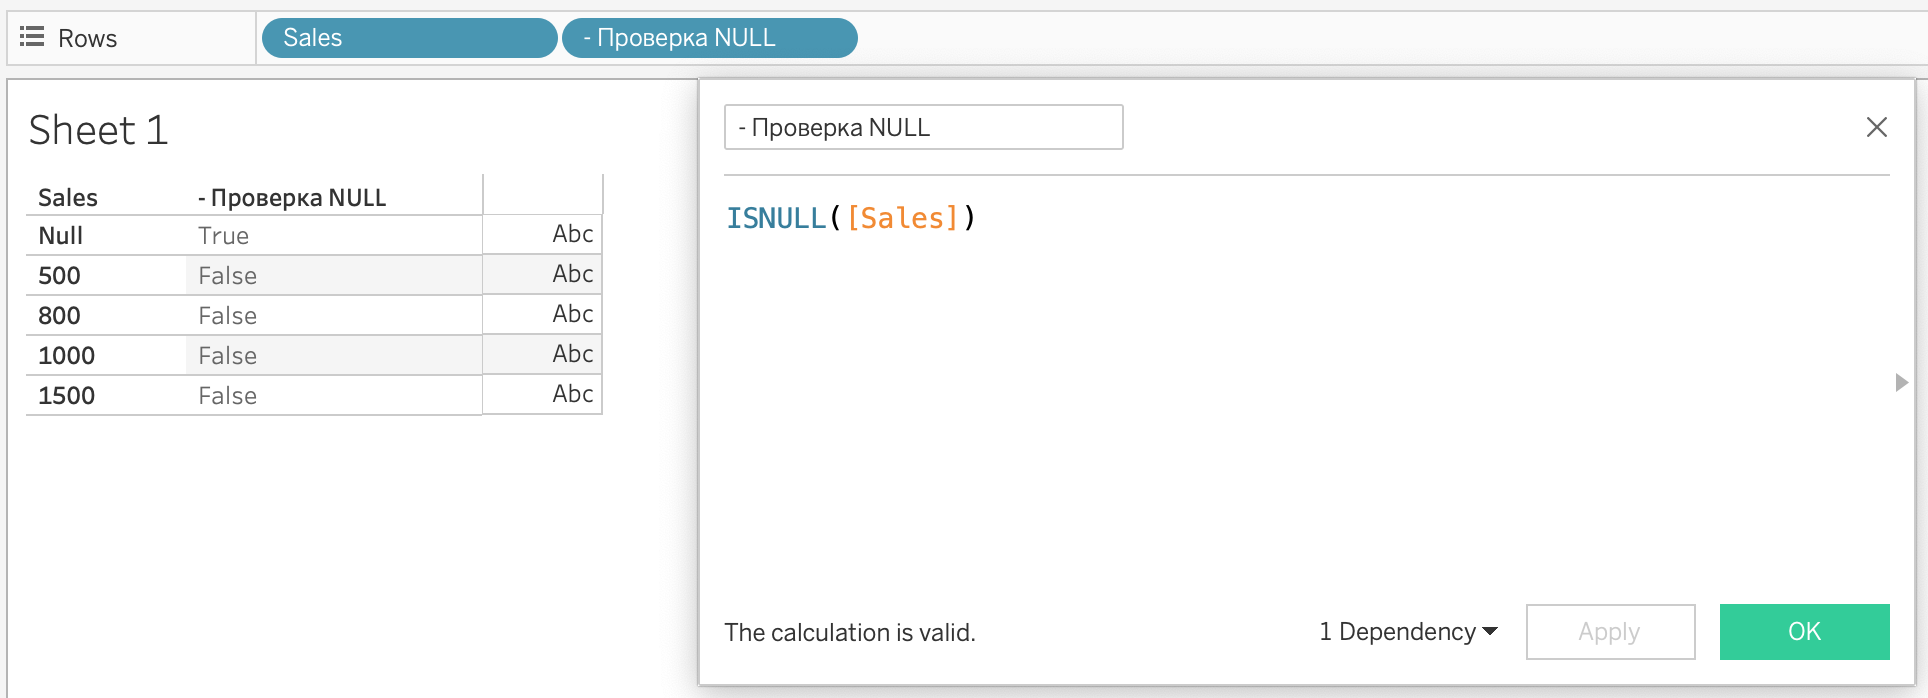

⠀**Как исправлять форматы?**  
* **Даты**:  
  * DATEPARSE("format", [String]): Преобразует строку в дату (например, DATEPARSE("dd-MM-yyyy", [Date String])).  
  * DATE([Field]): Пробует распознать дату из строки или числа.
* **Строки**:  
  * STR([Field]): Преобразует число или дату в строку (например, STR([Sales])).  
  * TRIM, LEFT, RIGHT: Очищают или обрезают строки (например, TRIM([Product Name])).
* **Числа**:  
  * FLOAT([String]) или INT([String]): Преобразует строку в число (например, FLOAT("1000")).

Если дата имеет такой вид:

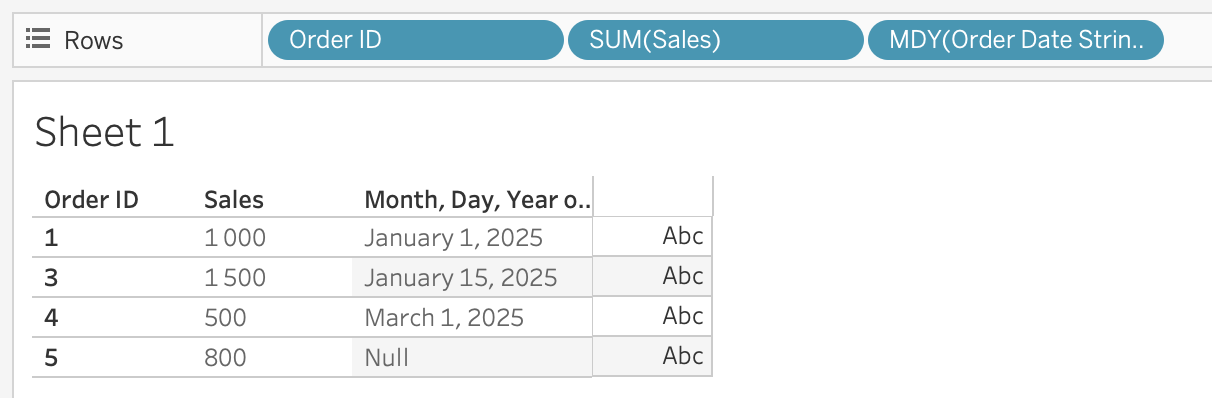<!-- {"width":482} -->

А в Data Source дата имеет совершенно друго вид:

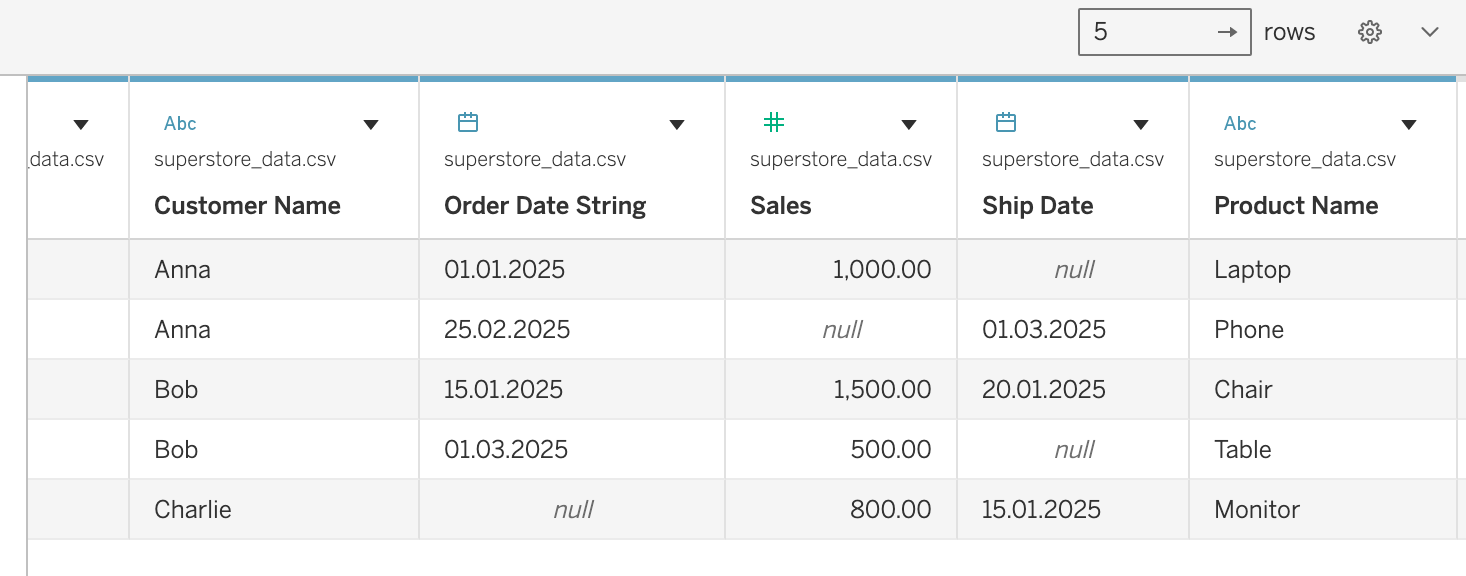<!-- {"width":482} -->

Сделайте следующее:
1) Выберите атрибут
2) Нажмите правой кнопкой мыше на нее или нажмите на стрелку вниз
3) В выпадающем списке выберите «More» -> «Custom…»

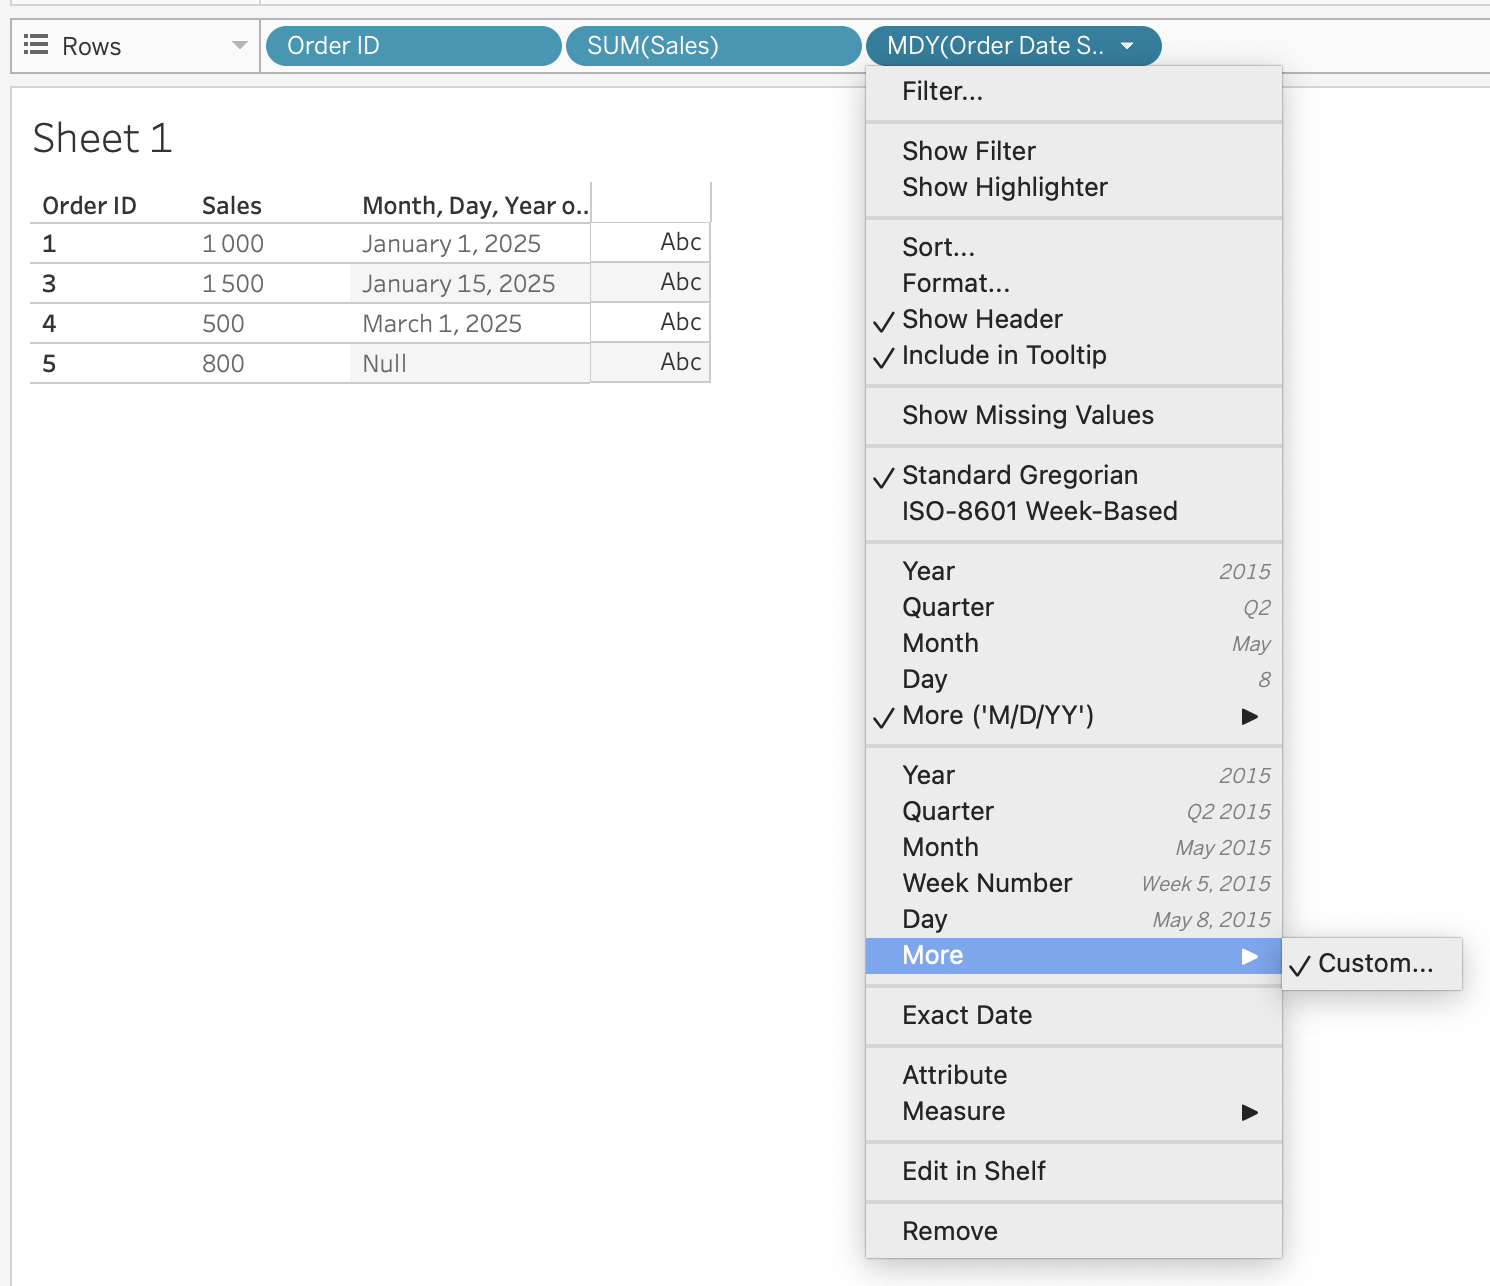<!-- {"width":482} -->

Выберите «Exact Data» и нажмите «Ok»:

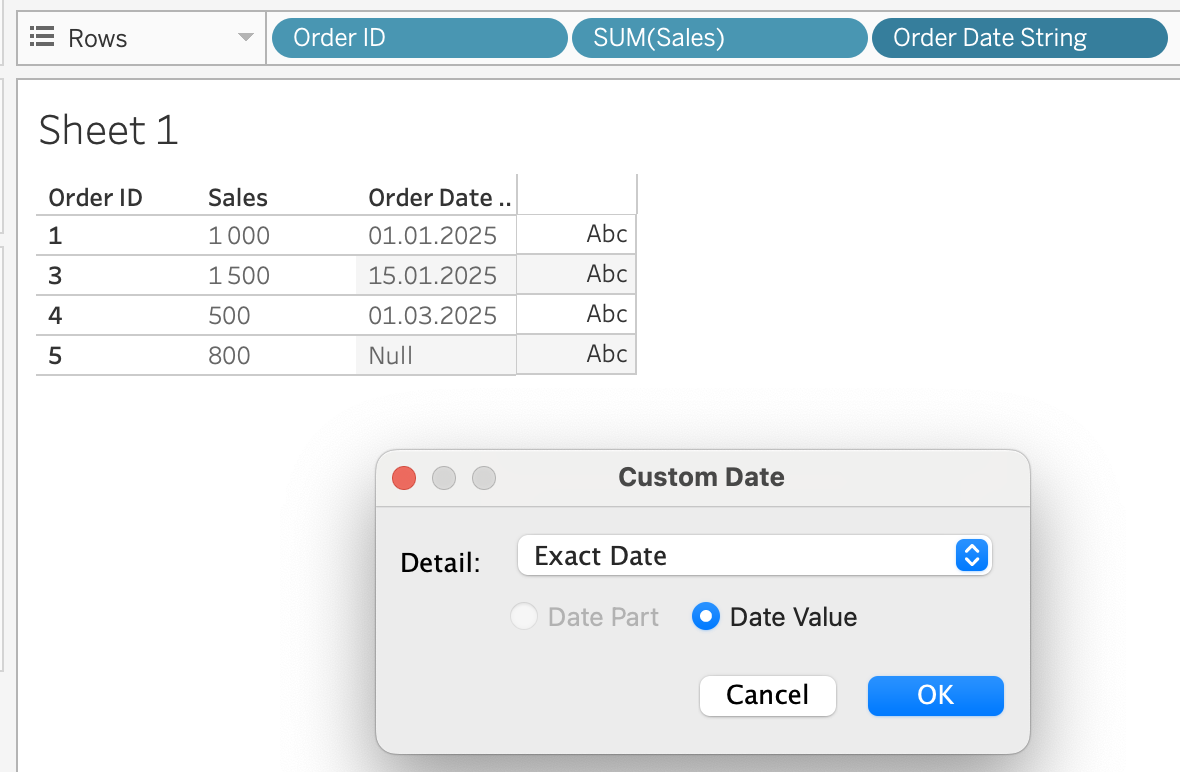<!-- {"width":482} -->

⠀**Как фильтры влияют на обработку?**  
* **Фильтры в рабочем листе**: Применяются после обработки NULL и форматов в формулах. Например, фильтр [Region] = "West" работает с уже исправленными данными.  
* **Фильтры на уровне Data Source**: Убирают данные до загрузки в Tableau. Если фильтр [Order Date] = 2025, формулы обработки NULL и форматов работают только с этими данными.  
* **Совет**: Проверяй фильтры в Data Source, чтобы знать, какие данные попадают в формулы.

⠀**Почему это важно?**
NULL и кривые форматы — как камни на дороге: если их не убрать, дашборд может "споткнуться". Обработка пропусков и исправление форматов спасают твои расчёты от ошибок и делают данные понятными для Tableau. Это основа, без которой дальше никуда.

## Примеры с таблицами
**Исходная таблица базы данных** (Superstore):  
| Order ID | Category | Region | Customer Name | Order Date String | Sales | Ship Date | Product Name |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 1 | Technology | West | Anna | "01-01-2025" | 1000 | NULL | "Laptop  " |
| 2 | Technology | East | Anna | "25-02-2025" | NULL | 2025-03-01 | "Phone" |
| 3 | Furniture | West | Bob | "15-01-2025" | 1500 | 2025-01-20 | "  Chair" |
| 4 | Furniture | East | Bob | "01-03-2025" | 500 | NULL | "Table" |
| 5 | Technology | West | Charlie | NULL | 800 | 2025-01-15 | "Monitor" |
* **Обработка NULL: ZN для продаж**  
  * **Условие**: Хотим посчитать сумму продаж по категориям, но некоторые заказы имеют NULL в Sales.  
  * **Что делаем**:  
    * Создаём вычисляемое поле:   ZN(SUM([Sales])) // Продажи без NULL
      
    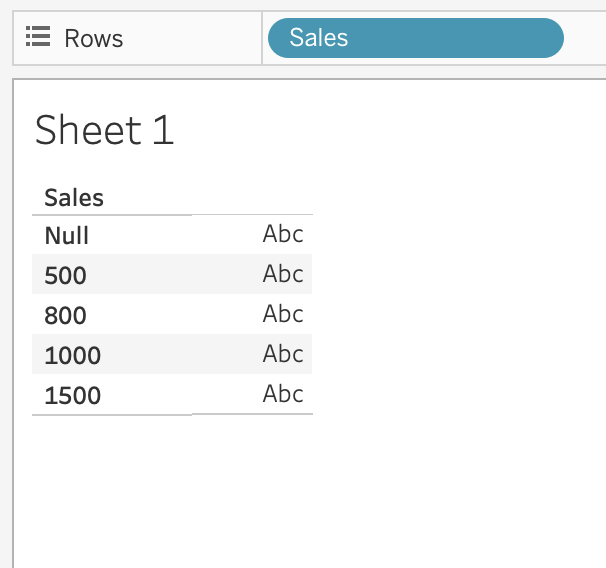<!-- {"width":251} -->
    
    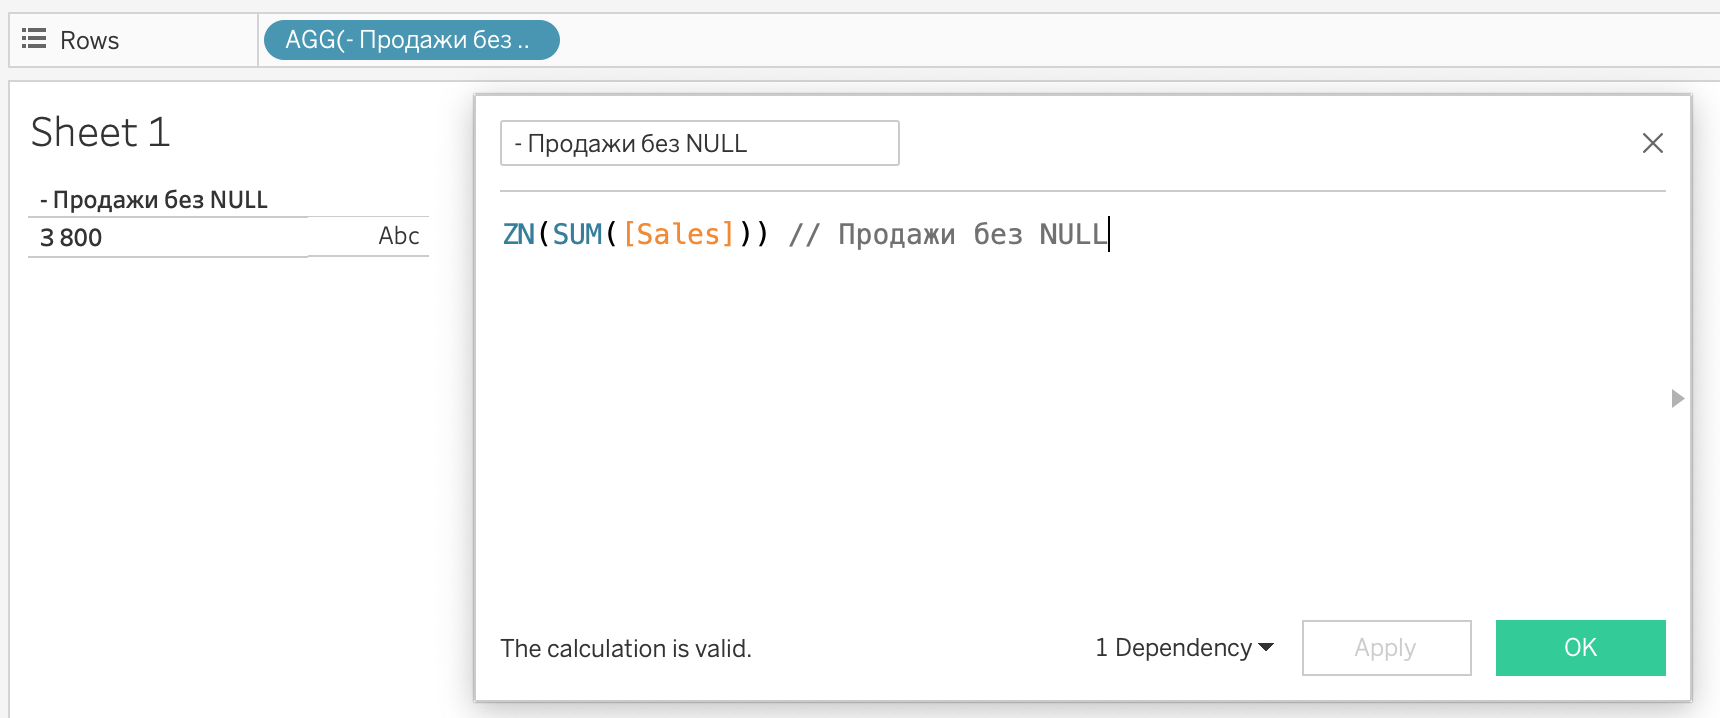
    
  * **Как работает**: ZN заменяет NULL на 0, включая все строки в сумму.  
  * **Пример**: Technology (1000, NULL, 800), Furniture (1500, 500).  
**Итоговая таблица** (визуализация с [Category]):  
| Category | SUM([Sales]) | Продажи без NULL |
|:-:|:-:|:-:|
| Technology | 1800 | 1800 |
| Furniture | 2000 | 2000 |

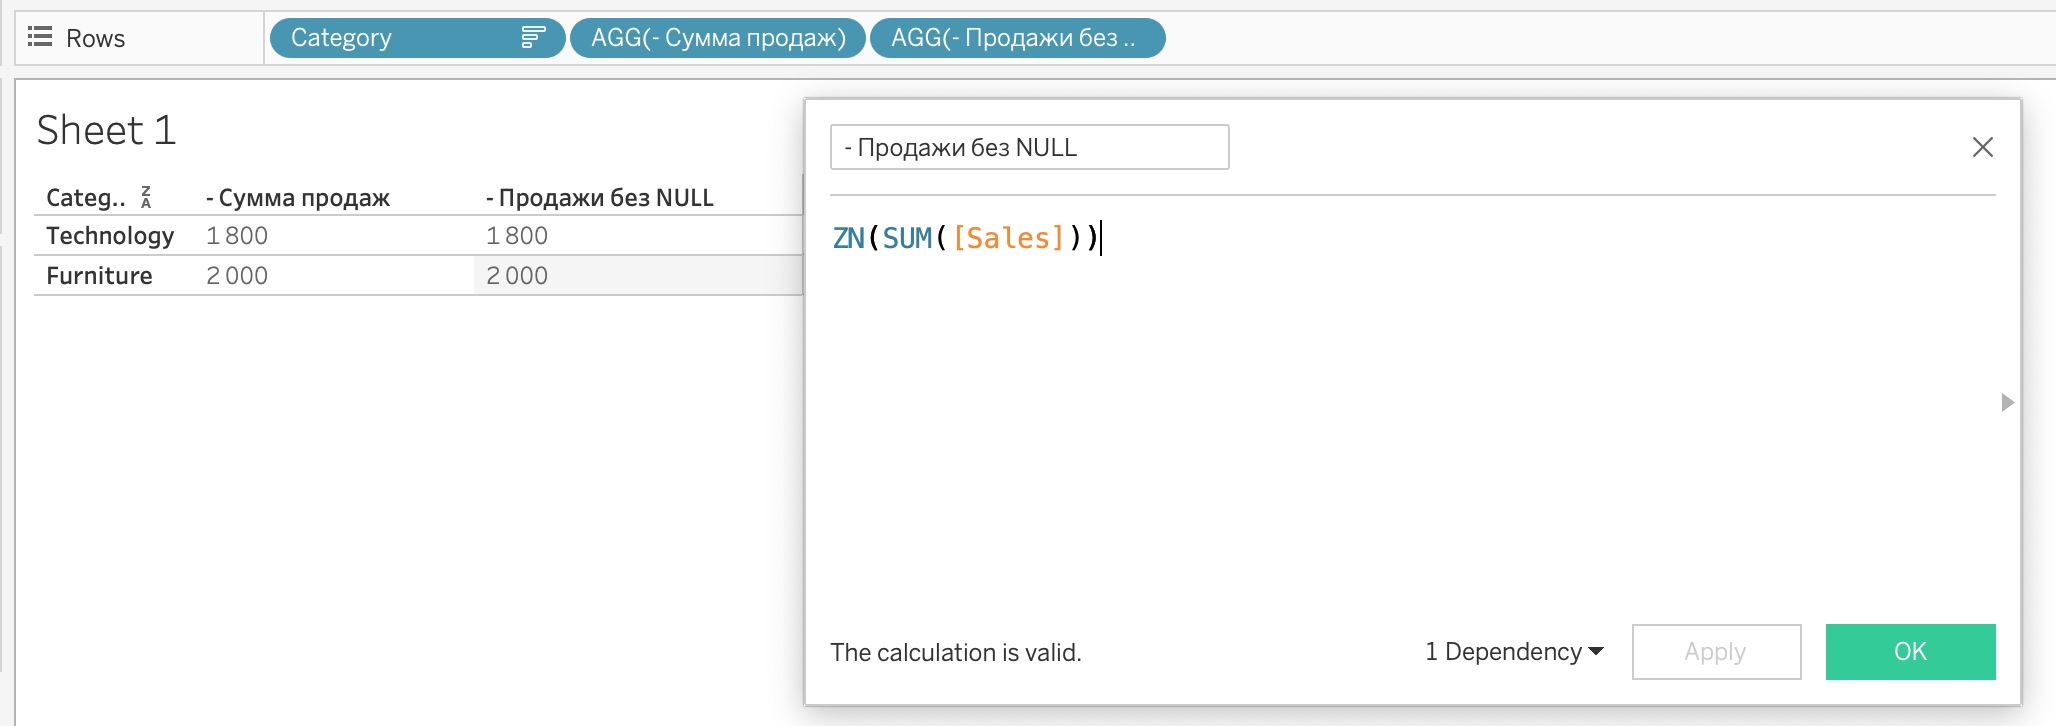

**Что получаем**: Без ZN Technology дала бы 1800, с ZN — тоже 1800, но формула надёжнее.

* **Обработка NULL: IFNULL для дат доставки**  
  * **Условие**: Хотим заменить NULL в Ship Date на текущую дату (23 июня 2025).  
  * **Что делаем**:  
    * Создаём вычисляемое поле:   IFNULL([Ship Date], TODAY()) // Дата доставки
  * **Как работает**: IFNULL заменяет NULL на TODAY().  
  * **Пример**: Order 1 (NULL → 2025-06-23), Order 2 (2025-03-01).  
**Итоговая таблица** (визуализация с [Order ID]):  
| Order ID | Ship Date | Дата доставки |
|:-:|:-:|:-:|
| 1 | NULL | 2025-06-23 |
| 2 | 2025-03-01 | 2025-03-01 |
| 3 | 2025-01-20 | 2025-01-20 |
| 4 | NULL | 2025-06-23 |
| 5 | 2025-01-15 | 2025-01-15 |

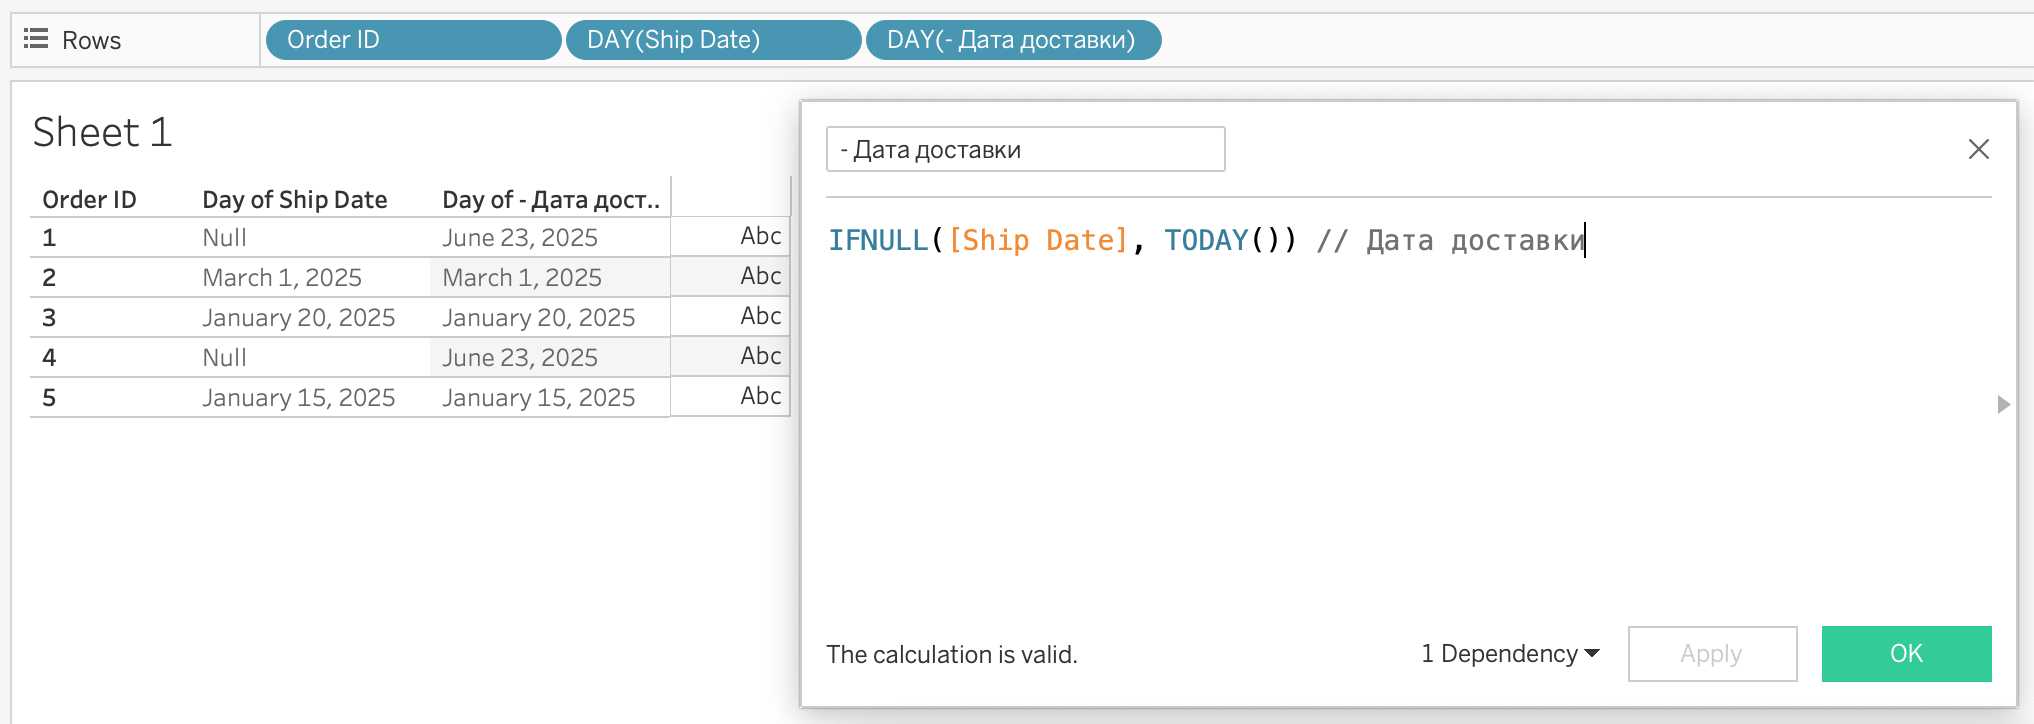

**Что получаем**: NULL заменены на текущую дату.
* **Обработка NULL: ISNULL для фильтрации**  
  * **Условие**: Хотим показать только заказы, где Sales не NULL.  
  * **Что делаем**:  
    * Создаём вычисляемое поле:   ISNULL([Sales]) // Пропуски продаж
    * Перетаскиваем в Filters, выбираем False.
  * **Как работает**: ISNULL возвращает True для NULL, False — для значений. Фильтр оставляет только False.  
  * **Пример**: Order 2 (NULL) исключается.  
**Итоговая таблица** (визуализация с [Order ID]):  
| Order ID | Sales |
|:-:|:-:|
| 1 | 1000 |
| 3 | 1500 |
| 4 | 500 |
| 5 | 800 |

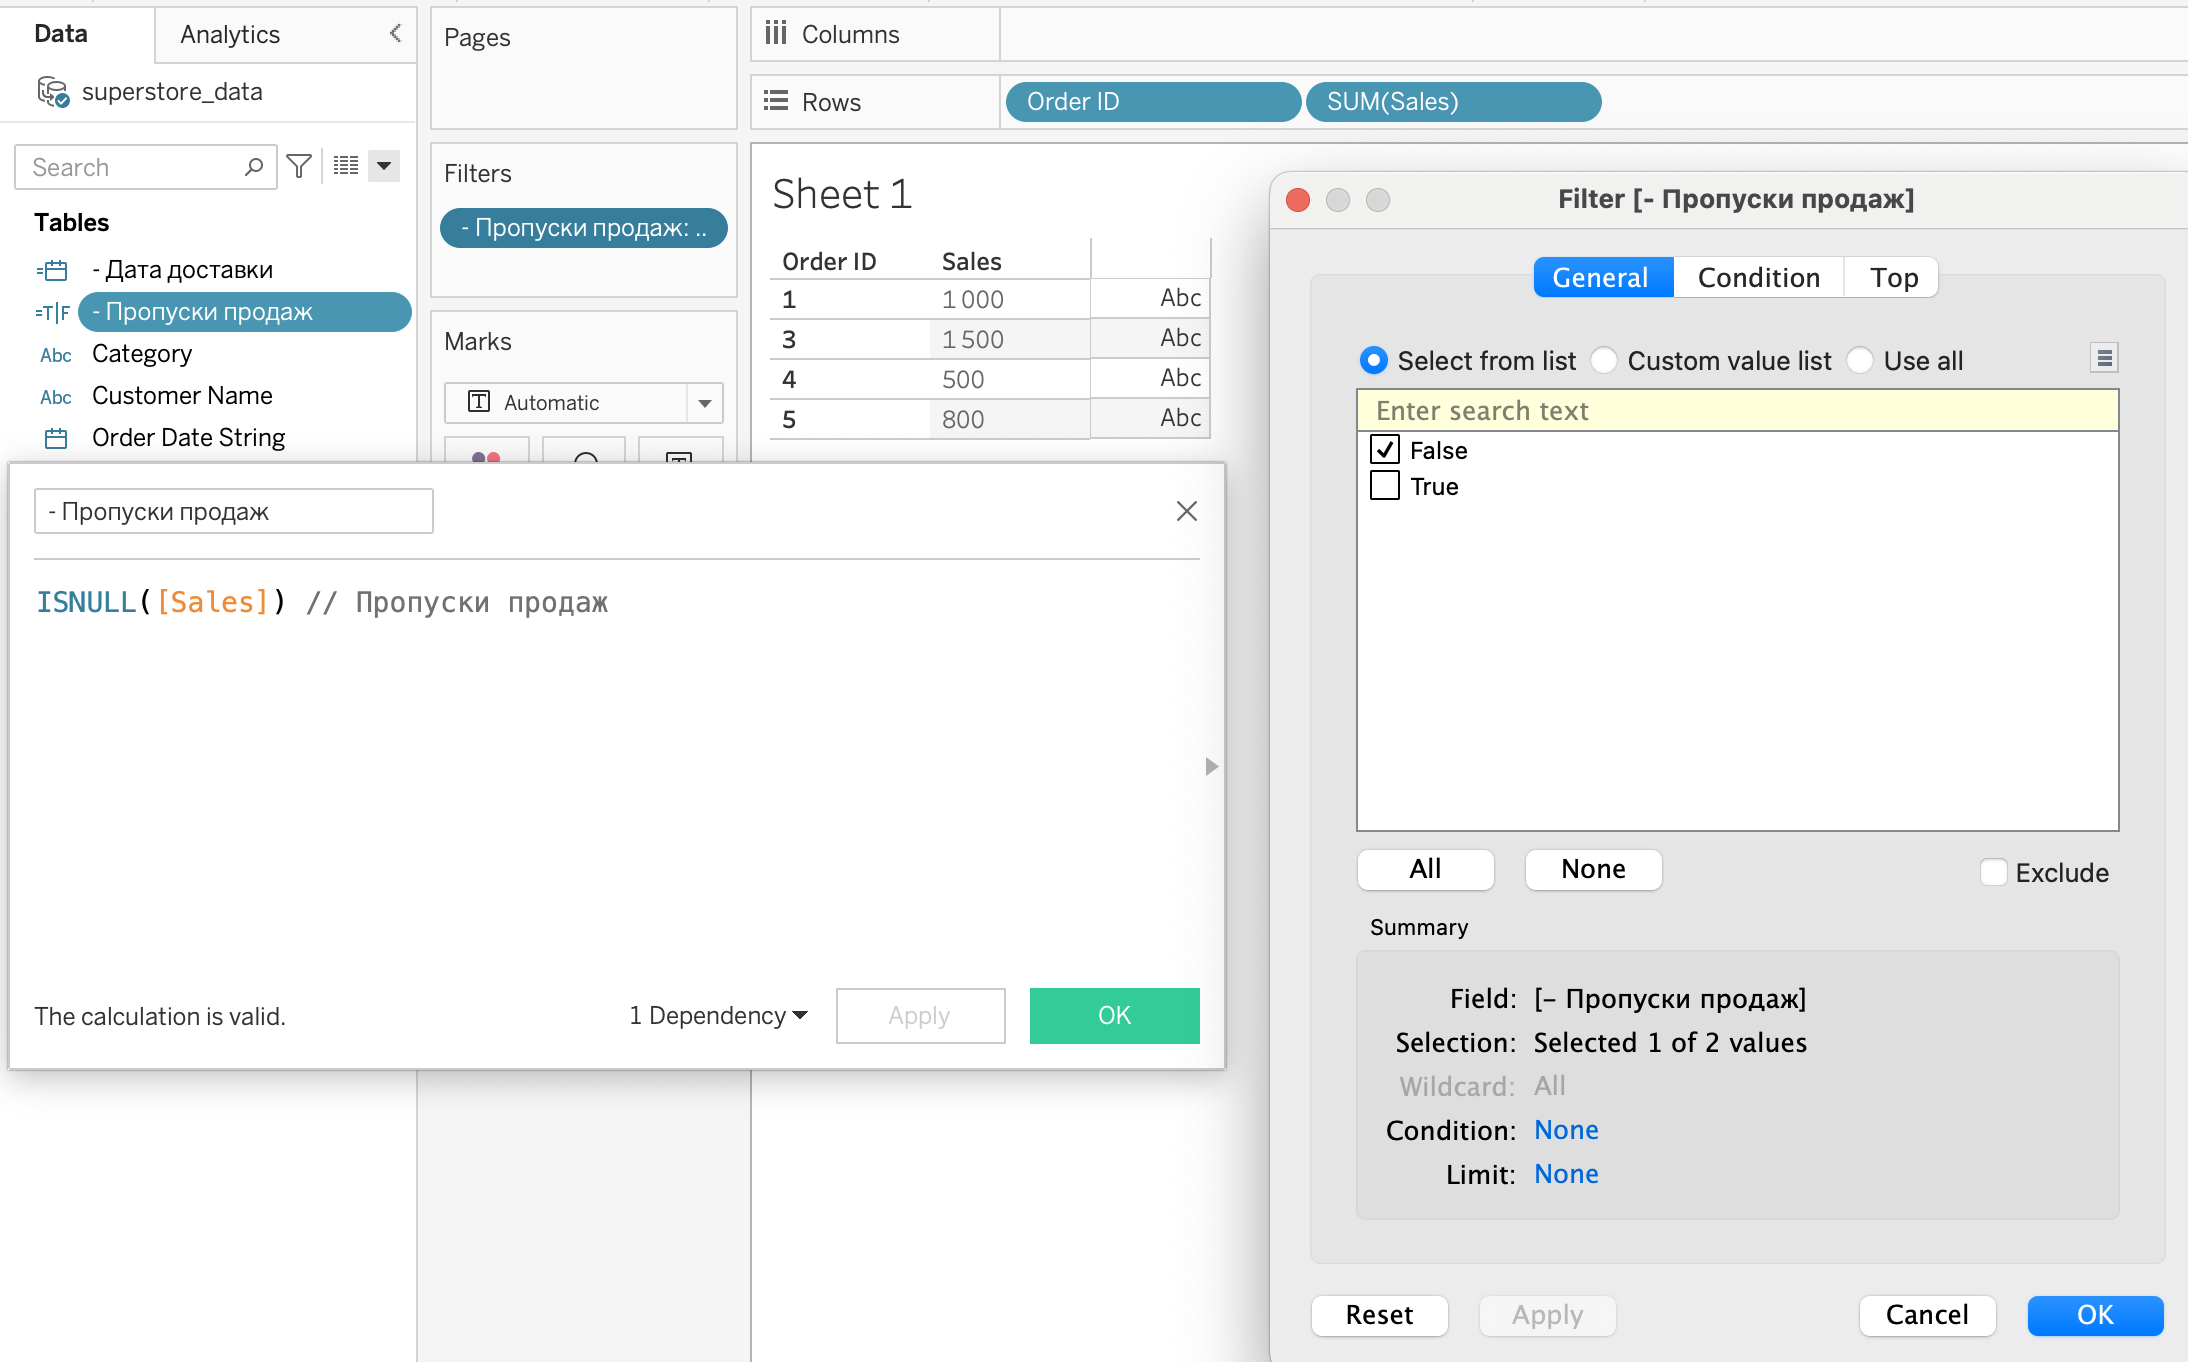

**Что получаем**: Только заказы с Sales.
* **Исправление формата: DATEPARSE для строк дат**  
  * **Условие**: Если Order Date String - это строкавой тип данных, а мы хотим преобразовать Order Date String ("dd-MM-yyyy") в дату.  
  * **Что делаем**:  
    * Создаём вычисляемое поле:   DATEPARSE("dd-MM-yyyy", [Order Date String]) // Исправленная дата
  * **Как работает**: DATEPARSE распознаёт формат строки и делает дату.  
  * **Пример**: "01-01-2025" → 2025-01-01.  
**Итоговая таблица** (визуализация с [Order ID]):  
| Order ID | Order Date String | Исправленная дата |
|:-:|:-:|:-:|
| 1 | "01-01-2025" | 2025-01-01 |
| 2 | "25-02-2025" | 2025-02-25 |
| 3 | "15-01-2025" | 2025-01-15 |
| 4 | "01-03-2025" | 2025-03-01 |
| 5 | NULL | NULL |
**Что получаем**: Строки преобразованы в даты, NULL остался NULL.
* **Исправление формата: TRIM для строк**  
  * **Условие**: Хотим убрать пробелы в Product Name (например, "Laptop  " → "Laptop").  
  * **Что делаем**:  
    * Создаём вычисляемое поле:   TRIM([Product Name]) // Очищенное имя
  * **Как работает**: TRIM удаляет пробелы в начале и конце строки.  
  * **Пример**: "Laptop  " → "Laptop", "  Chair" → "Chair".  
**Итоговая таблица** (визуализация с [Product Name]):  
| Product Name | Очищенное имя |
|:-:|:-:|
| Laptop | Laptop |
| Phone | Phone |
| Chair | Chair |
| Table | Table |
| Monitor | Monitor |

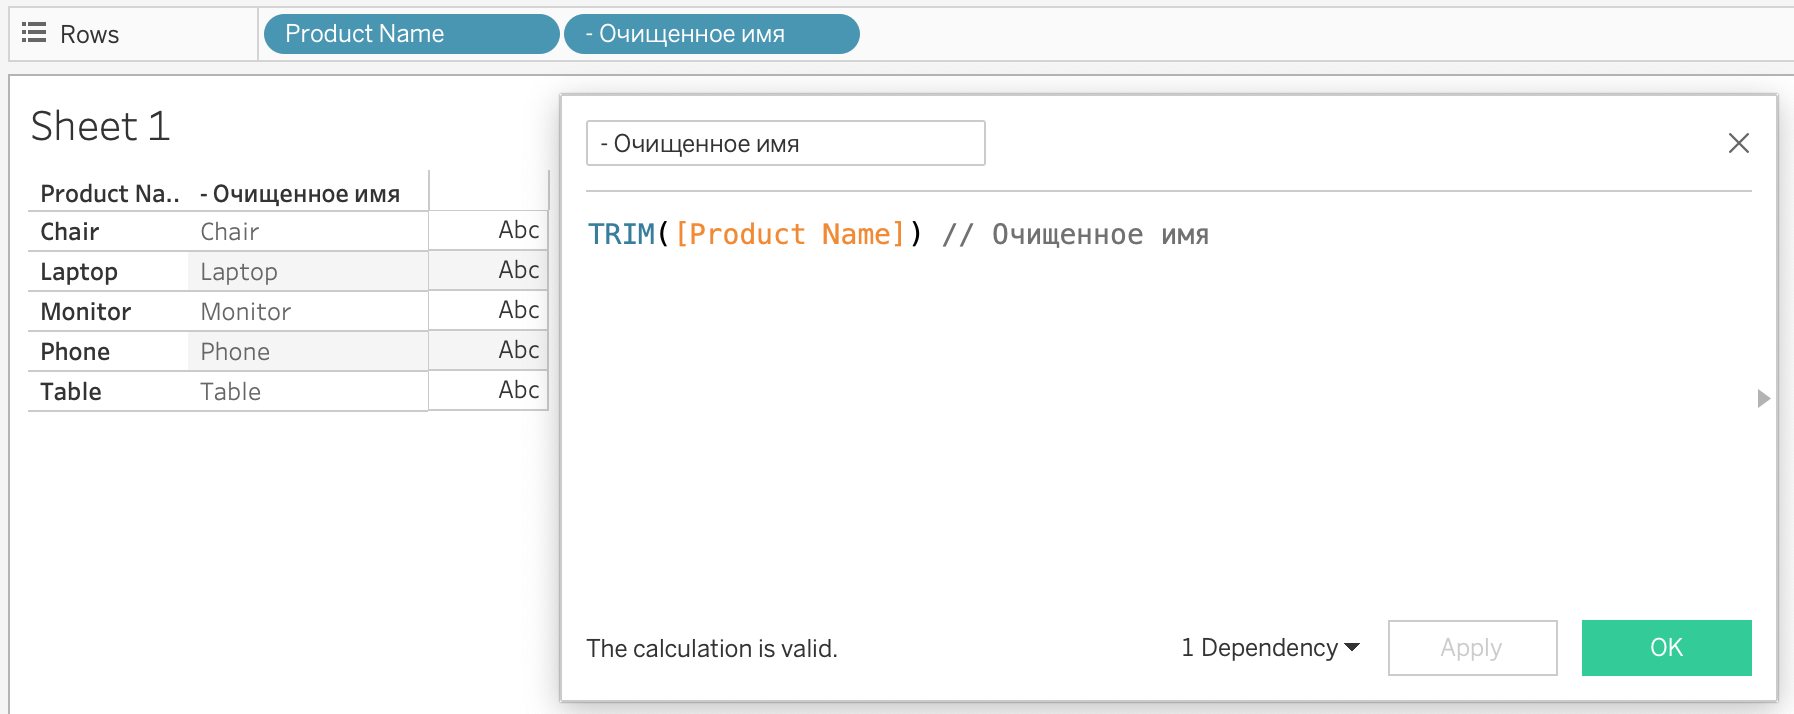

**Что получаем**: Чистые строки без пробелов.
* **Исправление формата: FLOAT для строковых чисел**  
  * **Условие**: Хотим преобразовать Sales, если они записаны как строки (например, "1000").  
  * **Что делаем**:  
    * Создаём вычисляемое поле:   FLOAT(STR([Sales])) // Числовые продажи
    * Для примера предположим, что Sales в базе — строки.
  * **Как работает**: STR гарантирует строковый формат, FLOAT делает число.  
  * **Пример**: "1000" → 1000.  
**Итоговая таблица** (визуализация с [Order ID]):  
| Order ID | Sales | Числовые продажи |
|:-:|:-:|:-:|
| 1 | 1000 | 1000 |
| 2 | NULL | NULL |
| 3 | 1500 | 1500 |
| 4 | 500 | 500 |
| 5 | 800 | 800 |

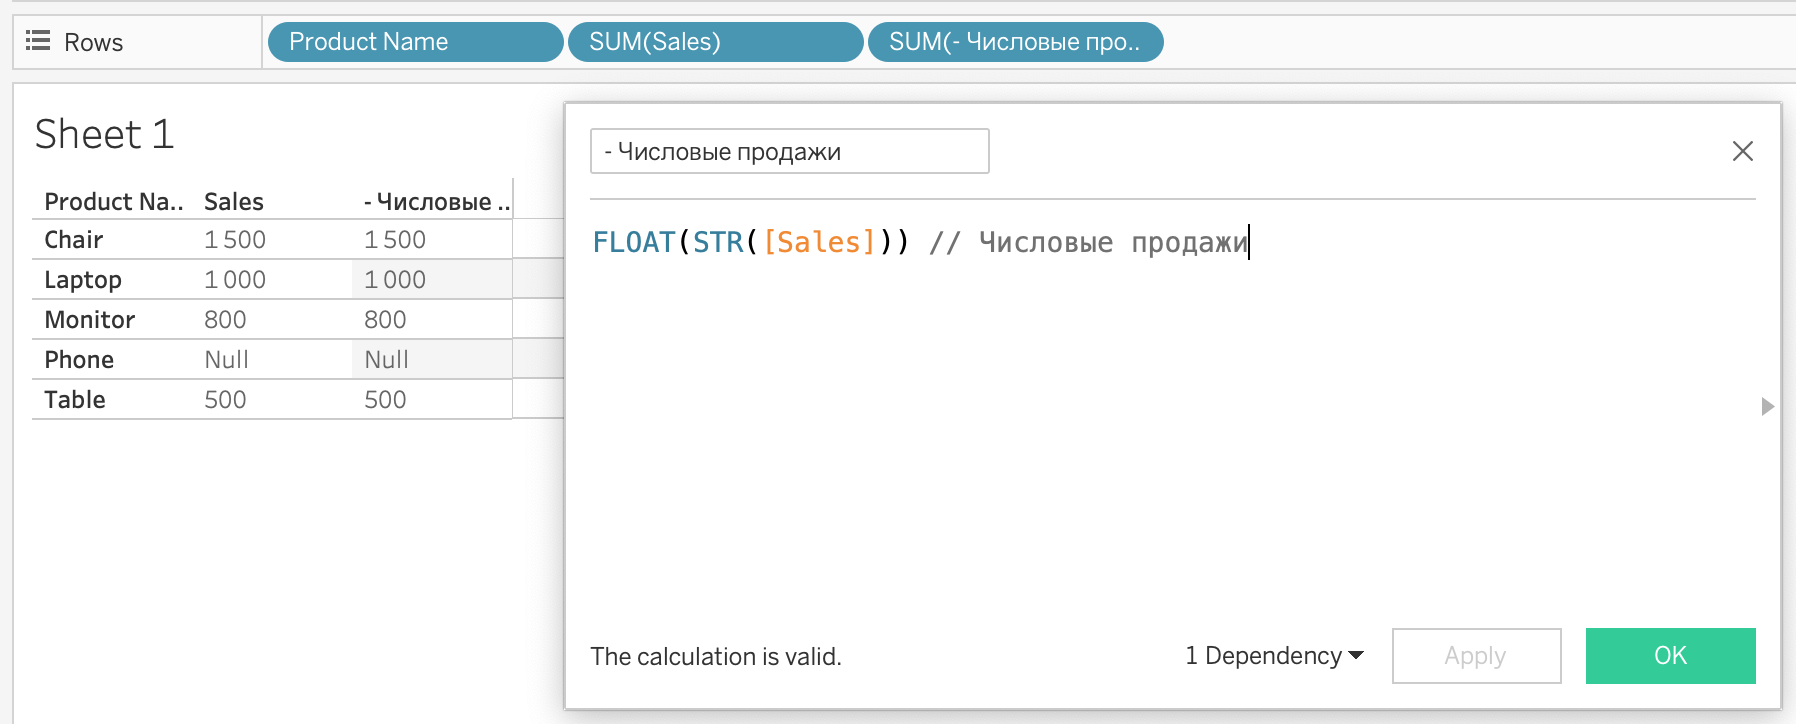

**Что получаем**: Sales как числа, NULL остался NULL.

## Рекомендации для новичков
* **Проверяй данные**: Перед формулами посмотри таблицу в Data Source, чтобы найти NULL или кривые форматы.  
* **Тестируй в таблице**: Построй таблицу с [Order ID] или [Category], добавь формулу и проверь результат.  
* **Проверяй фильтры**: Фильтры в рабочем листе и Data Source влияют на данные. Data Source фильтры (например, [Year] = 2025) ограничивают всё.  
* **Используй ZN для чисел**: Пиши ZN(SUM([Sales])) для агрегаций, чтобы NULL не ломал расчёты.  
* **Пиши комментарии**: Добавляй // Продажи без NULL или /* Исправленная дата */ в формулы, чтобы всё было ясно.  
* **Не усложняй**: Если ZN или IFNULL решают задачу, не пиши сложные IF ISNULL.  
* **Используй документацию**: Смотри help.tableau.com для функций вроде DATEPARSE или TRIM.  
* **Тестируй форматы**: Если даты или числа не работают, проверь их тип в панели Data (иконка #, ABC или календарь).

## Почему это важно?
Обработка NULL и форматов — это как фундамент дома: без него всё рухнет. NULL-значения могут сломать суммы или средние, а кривые даты или строки — испортить фильтры и графики. Освоишь этот модуль — твои дашборды будут работать как часы, даже если данные неидеальны. Это база, которая нужна для всех следующих модулей.

Всё ок? Напиши, если готов, и я могу взяться за другую тему или доработать эту (например, добавить примеры с более сложными форматами). Что скажешь, друг? ![](1f604_2.svg) Есть правки или го дальше?
